In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
sns.set()

In [26]:
data = pd.read_csv('Mall_customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
data2 = data.drop(['CustomerID'],axis=1)
data2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Text(0, 0.5, 'Spending Score')

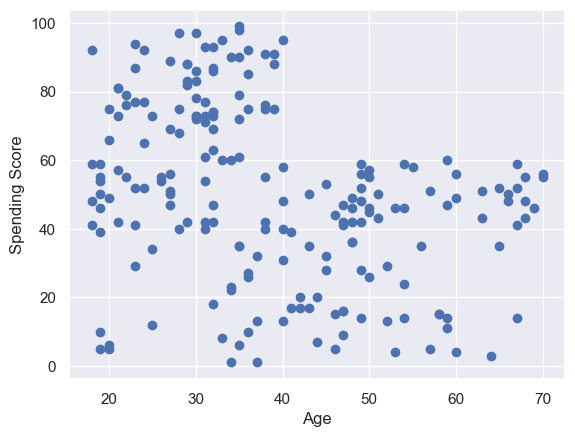

In [29]:
plt.scatter(data2['Age'],data2['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [30]:
from sklearn import preprocessing 

In [31]:
x = data2[['Age','Spending Score (1-100)']]
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [32]:
x_scaled = preprocessing.scale(x)
x_scaled

c:\Users\kansm\anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

In [34]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
wcss

[]

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

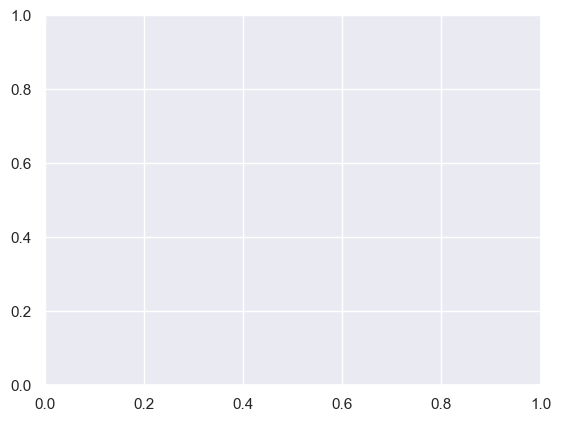

In [35]:
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [ ]:
kmeans = KMeans(3)
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [ ]:
data_with_clusters = data2.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x_scaled)
data_with_clusters.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0


AttributeError: Text.set() got an unexpected keyword argument 'Fontsize'

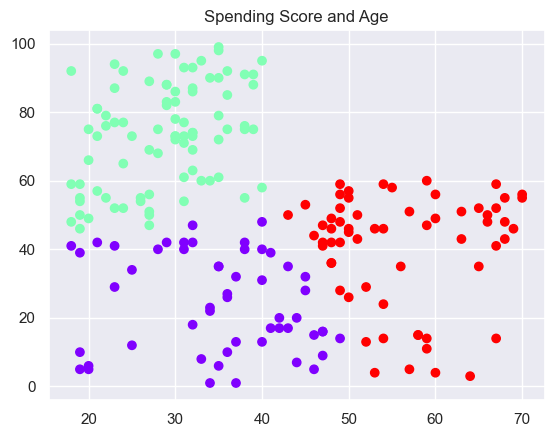

In [ ]:
plt.scatter(data2['Age'],data2['Spending Score (1-100)'],c= data_with_clusters['Clusters'],cmap='rainbow')
plt.title('Spending Score and Age', Fontsize=15)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
x2  = data2[['Spending Score (1-100)','Annual Income(k$)']]
x2_scaled = preprocessing.scale(x2)

KeyError: "['Annual Income(k$)'] not in index"

In [ ]:
kmeans2= KMeans(3)
kmeans2.fit(x2_scaled)

NameError: name 'x2_scaled' is not defined

In [ ]:
data_with_clusters2 = data2.copy()
data_with_clusters2['Clusters']=kmeans2.fit_predict(x2_scaled)
data_with_clusters2

NameError: name 'x2_scaled' is not defined

In [ ]:
plt.scatter(data2['Spending Score (1-100)'],data2['Annual Income (k$)'], c = data_with_clusters2['Clusters'],cmap='rainbow')
plt.title('Spending Score and Annual Income', Fontsize =15)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

KeyError: 'Clusters'